# Summary of results

* Single target at high elevation (no repointing) -- delay tracking and data output good
* Small difference in elevation (5 deg separation) -- looks like CNIC issues
* Very small elevation difference (1 deg separation) -- delay tracking and data output good
* Small azimuth difference (1 deg separation) -- looks like CNIC issues
* Single target at low elevation (no repointing) -- delay tracking and data output good
* Azimuth difference (22 deg separation) -- looks like CNIC issues
* Test target coordinates (20 deg separation) -- delay tracking and data output good
* Large angular separation (50 deg) -- delay tracking and data output good

In [25]:
from astropy import units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord, ICRS
from astropy.coordinates import get_sun
from datetime import datetime

import numpy as np

Define the location of the SKA Low telescope as the array center
SKA coordinates Reference: SKA1 Low Configuration Coordinates - Complete Set (SKA-TEL-SKO-0000422)

SKA1-Low Array Center: [lat, lon] = [-26.82472208deg, 116.7644482deg,] WGS84

In [26]:
# geodetic coordinates of the local origina
ref_station = np.array([-26.82472208, 116.7644482, 349.0])
# geodetic coordinates of the local origin
ref_location = EarthLocation(lat=ref_station[0]*u.deg, lon=ref_station[1]*u.deg, height=ref_station[2]*u.m)
print(ref_location.lat, ref_location.lon, ref_location.height)

-26d49m28.999488s 116d45m52.01352s 348.99999999952166 m


## Single target high elevation

```
altaz_a = {"alt": 50, "az": 45}
altaz_b = {"alt": 50, "az": 45}
```

In [27]:
altitude1 = 50*u.deg  # degrees
azimuth1 = 45* u.deg

altitude2 = 50*u.deg  # degrees
azimuth2 = 45*u.deg

In [28]:
repoint_time = datetime.fromisoformat('1970-01-02 15:44:26.166156') # time of repointing (between scans)
# current elevation
altazframe = AltAz(obstime=[repoint_time], location=ref_location)
print(altazframe)

test_target1 = SkyCoord(alt = altitude1, az = azimuth1, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target2 = SkyCoord(alt = altitude2, az = azimuth2, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target_radec1 = test_target1.transform_to(ICRS)
test_target_radec2 = test_target2.transform_to(ICRS)

print(f"Repointing from target ({test_target_radec1.to_string('hmsdms')}) to target ({test_target_radec2.to_string('hmsdms')}) over angle {test_target_radec1.separation(test_target_radec2)}")

<AltAz Frame (obstime=[datetime.datetime(1970, 1, 2, 15, 44, 26, 166156)], location=(-2565037.99995156, 5085750.94817946, -2861055.21935413) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>
Repointing from target (08h08m50.96239296s +03d20m44.25204368s) to target (08h08m50.96239296s +03d20m44.25204368s) over angle 0.0 deg


```
Target Number of packets to capture: 208512
1970-01-02 15:44:26.166156: 2304
1970-01-02 15:44:26.166156: []
1970-01-02 15:44:31.175860: 9216
1970-01-02 15:44:31.175860: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [24997.0, 25008], "stn_delay_ns": [{"stn": 345, "ns": -13196.589811609652}, {"stn": 350, "ns": -13005.691066089297}, {"stn": 352, "ns": -9074.041547227156}, {"stn": 431, "ns": -25068.496381539906}]}]}, {"current_secs": 25005.87085824, "pkt_no_spread": 0}]
1970-01-02 15:44:36.186310: 16100
1970-01-02 15:44:36.186310: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [25018.0, 25008], "stn_delay_ns": [{"stn": 345, "ns": -12073.188024039377}, {"stn": 350, "ns": -11922.824018553592}, {"stn": 352, "ns": -6888.685724915258}, {"stn": 431, "ns": -23804.55318609704}]}]}, {"current_secs": 25013.87108352, "pkt_no_spread": 0}]
...

Target Number of packets to capture: 208512
1970-01-02 15:47:16.023752: 214272
1970-01-02 15:47:16.023752: []
1970-01-02 15:47:21.034475: 221184
1970-01-02 15:47:21.034475: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [25178.0, 25168.0], "stn_delay_ns": [{"stn": 345, "ns": -12107.257127229994}, {"stn": 350, "ns": -11955.155870394168}, {"stn": 352, "ns": -6982.74750357215}, {"stn": 431, "ns": -23825.591679130568}]}]}, {"current_secs": 25177.8613248, "pkt_no_spread": 0}]
1970-01-02 15:47:26.045089: 226944
1970-01-02 15:47:26.045089: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [25178.0, 25168.0], "stn_delay_ns": [{"stn": 345, "ns": -12107.257127229994}, {"stn": 350, "ns": -11955.155870394168}, {"stn": 352, "ns": -6982.74750357215}, {"stn": 431, "ns": -23825.591679130568}]}]}, {"current_secs": 25177.8613248, "pkt_no_spread": 0}]
...

```

```
/mnt/clp-k8s-fpga-worker-1/pcap/output/20240821_065554_corr-0_0_7-main_0b854483.cnic-0_1_12.sdp.pcap
```

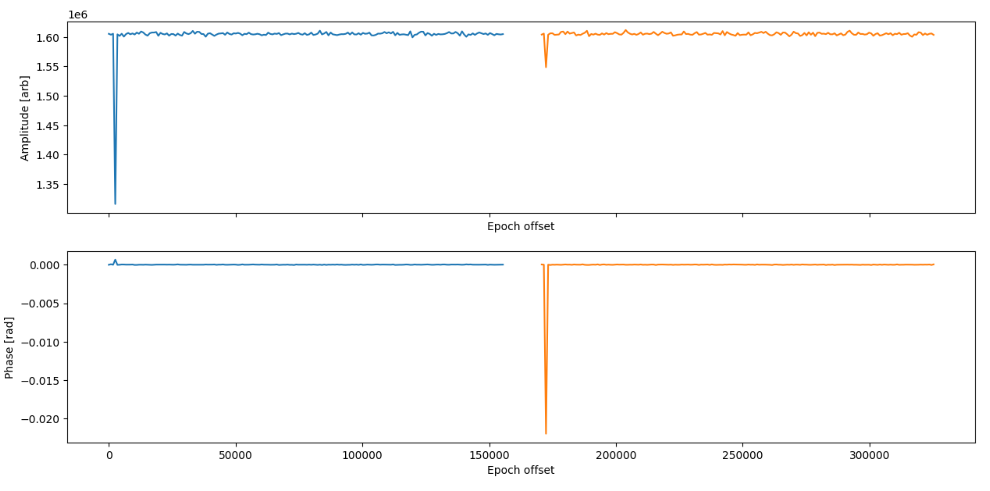

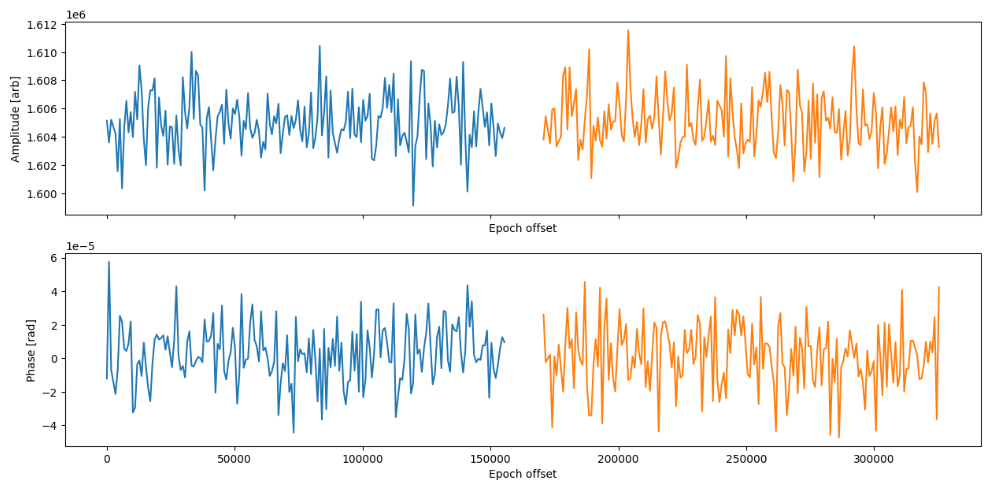

## Small elevation difference

```
altaz_a = {"alt": 50, "az": 45}
altaz_b = {"alt": 55, "az": 45}
```

In [29]:
altitude1 = 50*u.deg  # degrees
azimuth1 = 45* u.deg

altitude2 = 55*u.deg  # degrees
azimuth2 = 45*u.deg

In [30]:
repoint_time = datetime.fromisoformat('1970-01-02 15:58:46.036920') # time of repointing (between scans)
# current elevation
altazframe = AltAz(obstime=[repoint_time], location=ref_location)
print(altazframe)

test_target1 = SkyCoord(alt = altitude1, az = azimuth1, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target2 = SkyCoord(alt = altitude2, az = azimuth2, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target_radec1 = test_target1.transform_to(ICRS)
test_target_radec2 = test_target2.transform_to(ICRS)

print(f"Repointing from target ({test_target_radec1.to_string('hmsdms')}) to target ({test_target_radec2.to_string('hmsdms')}) over angle {test_target_radec1.separation(test_target_radec2)}")

<AltAz Frame (obstime=[datetime.datetime(1970, 1, 2, 15, 58, 46, 36920)], location=(-2565037.99995156, 5085750.94817946, -2861055.21935413) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>
Repointing from target (08h23m13.1341719s +03d20m13.39196572s) to target (08h10m32.89319284s -00d31m58.96751s) over angle 5.000198234188679 deg


```
Target Number of packets to capture: 208512
1970-01-02 15:58:46.036920: 2304
1970-01-02 15:58:46.036920: []
1970-01-02 15:58:51.047921: 9216
1970-01-02 15:58:51.047921: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [25858.0, 25873], "stn_delay_ns": [{"stn": 345, "ns": -12207.163935844306}, {"stn": 350, "ns": -12049.524682088517}, {"stn": 352, "ns": -7283.789190796752}, {"stn": 431, "ns": -23871.70172836624}]}]}, {"current_secs": 25863.23091456, "pkt_no_spread": 0}]
1970-01-02 15:58:56.059788: 16128
1970-01-02 15:58:56.059788: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [25858.0, 25873], "stn_delay_ns": [{"stn": 345, "ns": -12207.163935844306}, {"stn": 350, "ns": -12049.524682088517}, {"stn": 352, "ns": -7283.789190796752}, {"stn": 431, "ns": -23871.70172836624}]}]}, {"current_secs": 25863.23091456, "pkt_no_spread": 0}]
...

Target Number of packets to capture: 208512
1970-01-02 16:01:35.964748: 214272
1970-01-02 16:01:35.964748: []
1970-01-02 16:01:40.975806: 221184
1970-01-02 16:01:40.975806: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [26033.0, 26043.0], "stn_delay_ns": [{"stn": 345, "ns": -12108.39206256411}, {"stn": 350, "ns": -11956.252243820802}, {"stn": 352, "ns": -6984.819068861308}, {"stn": 431, "ns": -23826.952773592842}]}]}, {"current_secs": 26035.22359296, "pkt_no_spread": 0}]
1970-01-02 16:01:45.986832: 228096
1970-01-02 16:01:45.986832: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [26033.0, 26043.0], "stn_delay_ns": [{"stn": 345, "ns": -12108.39206256411}, {"stn": 350, "ns": -11956.252243820802}, {"stn": 352, "ns": -6984.819068861308}, {"stn": 431, "ns": -23826.952773592842}]}]}, {"current_secs": 26035.22359296, "pkt_no_spread": 0}]
```

```
/mnt/clp-k8s-fpga-worker-1/pcap/output/20240821_071019_corr-0_0_7-main_0b854483.cnic-0_1_12.sdp.pcap
```

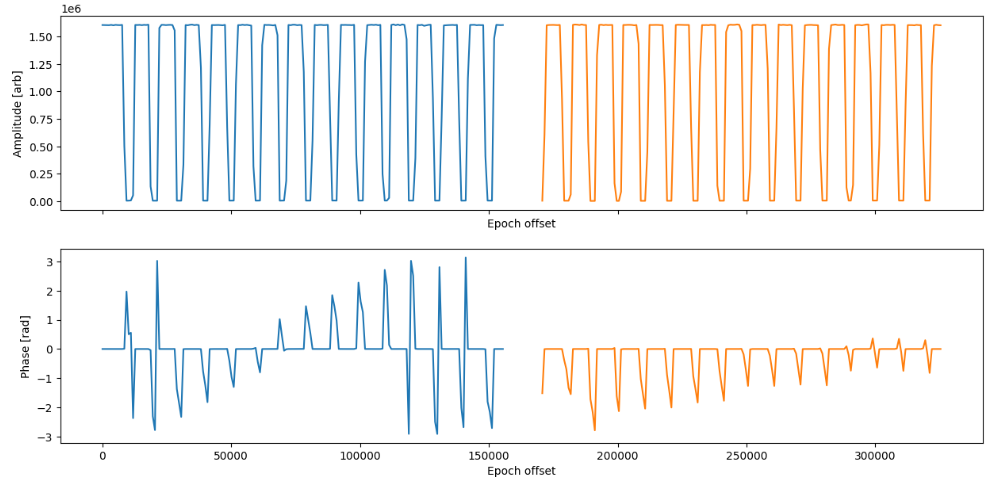

## Small altitude difference

```
altaz_a = {"alt": 54, "az": 45}
altaz_b = {"alt": 55, "az": 45}
```

In [31]:
altitude1 = 54*u.deg  # degrees
azimuth1 = 45* u.deg

altitude2 = 55*u.deg  # degrees
azimuth2 = 45*u.deg

In [32]:
repoint_time = datetime.fromisoformat('1970-01-02 19:10:14.740336') # time of repointing (between scans)
# current elevation
altazframe = AltAz(obstime=[repoint_time], location=ref_location)
print(altazframe)

test_target1 = SkyCoord(alt = altitude1, az = azimuth1, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target2 = SkyCoord(alt = altitude2, az = azimuth2, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target_radec1 = test_target1.transform_to(ICRS)
test_target_radec2 = test_target2.transform_to(ICRS)

print(f"Repointing from target ({test_target_radec1.to_string('hmsdms')}) to target ({test_target_radec2.to_string('hmsdms')}) over angle {test_target_radec1.separation(test_target_radec2)}")

<AltAz Frame (obstime=[datetime.datetime(1970, 1, 2, 19, 10, 14, 740336)], location=(-2565037.99995156, 5085750.94817946, -2861055.21935413) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>
Repointing from target (11h25m05.61977526s +00d10m09.13873716s) to target (11h22m34.07888786s -00d36m22.91630434s) over angle 1.0000949561315267 deg


```
Target Number of packets to capture: 208512
1970-01-02 19:10:14.740336: 2304
1970-01-02 19:10:14.740336: []
1970-01-02 19:10:19.752913: 9216
1970-01-02 19:10:19.752913: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [37355, null], "stn_delay_ns": [{"stn": 345, "ns": -12956.0930616874}, {"stn": 350, "ns": -12775.157532853078}, {"stn": 352, "ns": -8534.526994911437}, {"stn": 431, "ns": -24842.37164783283}]}]}, {"current_secs": 37365.83847936, "pkt_no_spread": 0}]
1970-01-02 19:10:24.764723: 16128
1970-01-02 19:10:24.764723: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [37355, 37365.0], "stn_delay_ns": [{"stn": 345, "ns": -12956.0930616874}, {"stn": 350, "ns": -12775.157532853078}, {"stn": 352, "ns": -8534.526994911437}, {"stn": 431, "ns": -24842.37164783283}]}]}, {"current_secs": 37373.83870464, "pkt_no_spread": 0}]
...

Target Number of packets to capture: 208512
1970-01-02 19:12:54.584100: 215424
1970-01-02 19:12:54.584100: []
1970-01-02 19:12:59.593163: 222336
1970-01-02 19:12:59.593163: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [37515.0, 37505.0], "stn_delay_ns": [{"stn": 345, "ns": -12985.48721288095}, {"stn": 350, "ns": -12802.95773877395}, {"stn": 352, "ns": -8621.083763646313}, {"stn": 431, "ns": -24857.18322157952}]}]}, {"current_secs": 37525.95136512, "pkt_no_spread": 0}]
1970-01-02 19:13:04.604593: 229248
1970-01-02 19:13:04.604593: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [37515.0, 37525.0], "stn_delay_ns": [{"stn": 345, "ns": -12987.394119671952}, {"stn": 350, "ns": -12804.759074161047}, {"stn": 352, "ns": -8626.822103220311}, {"stn": 431, "ns": -24858.068002873828}]}]}, {"current_secs": 37533.9515904, "pkt_no_spread": 0}]
```

```
/mnt/clp-k8s-fpga-worker-1/pcap/output/20240821_102141_corr-0_0_7-main_0b854483.cnic-0_1_12.sdp.pcap
```

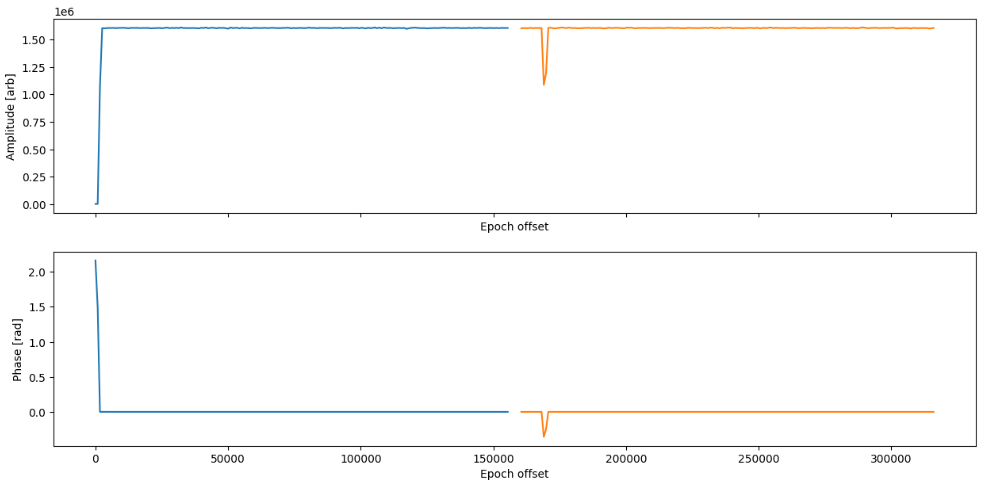

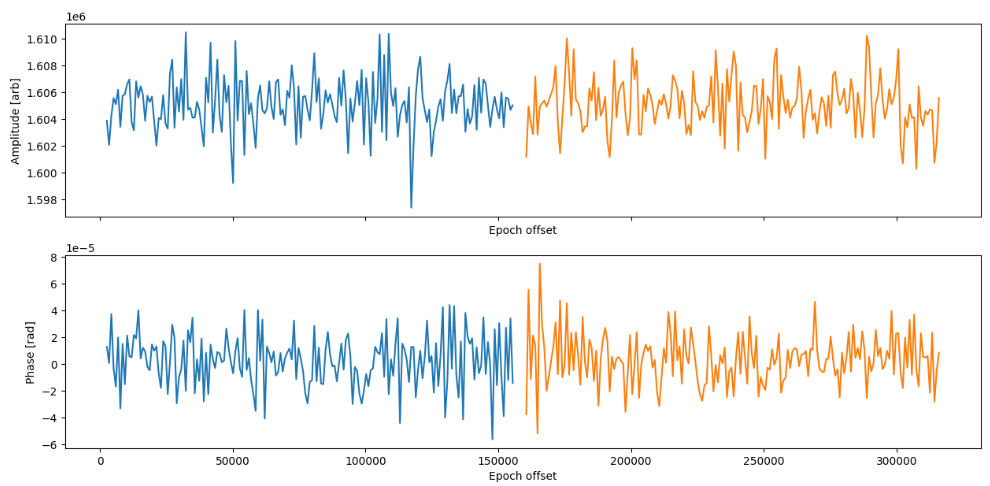

## Small azimuth difference

```
altaz_a = {"alt": 55, "az": 45}
altaz_b = {"alt": 55, "az": 44}
```

In [33]:
altitude1 = 55*u.deg  # degrees
azimuth1 = 45* u.deg

altitude2 = 55*u.deg  # degrees
azimuth2 = 44*u.deg

In [34]:
repoint_time = datetime.fromisoformat('1970-01-02 19:24:34.826089') # time of repointing (between scans)
# current elevation
altazframe = AltAz(obstime=[repoint_time], location=ref_location)
print(altazframe)

test_target1 = SkyCoord(alt = altitude1, az = azimuth1, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target2 = SkyCoord(alt = altitude2, az = azimuth2, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target_radec1 = test_target1.transform_to(ICRS)
test_target_radec2 = test_target2.transform_to(ICRS)

print(f"Repointing from target ({test_target_radec1.to_string('hmsdms')}) to target ({test_target_radec2.to_string('hmsdms')}) over angle {test_target_radec1.separation(test_target_radec2)}")

<AltAz Frame (obstime=[datetime.datetime(1970, 1, 2, 19, 24, 34, 826089)], location=(-2565037.99995156, 5085750.94817946, -2861055.21935413) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>
Repointing from target (11h36m56.62407705s -00d36m27.4707058s) to target (11h35m09.22939535s -00d14m55.35962325s) over angle 0.5736270252493664 deg


```
Target Number of packets to capture: 208512
1970-01-02 19:24:34.826089: 2304
1970-01-02 19:24:34.826089: []
1970-01-02 19:24:39.837913: 9216
1970-01-02 19:24:39.837913: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [38205.0, 38224], "stn_delay_ns": [{"stn": 345, "ns": -13273.499452091586}, {"stn": 350, "ns": -13078.286420763292}, {"stn": 352, "ns": -9309.37754098009}, {"stn": 431, "ns": -25101.845140896927}]}]}, {"current_secs": 38209.980579840005, "pkt_no_spread": 0}]
1970-01-02 19:24:44.846591: 16128
1970-01-02 19:24:44.846591: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [38205.0, 38224], "stn_delay_ns": [{"stn": 345, "ns": -13273.499452091586}, {"stn": 350, "ns": -13078.286420763292}, {"stn": 352, "ns": -9309.37754098009}, {"stn": 431, "ns": -25101.845140896927}]}]}, {"current_secs": 38209.980579840005, "pkt_no_spread": 0}]
...

Target Number of packets to capture: 208512
1970-01-02 19:27:24.673699: 217728
1970-01-02 19:27:24.673699: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [38374.0, 38384.0], "stn_delay_ns": [{"stn": 345, "ns": -13185.6021328903}, {"stn": 350, "ns": -12995.77999115158}, {"stn": 352, "ns": -9015.107863358753}, {"stn": 431, "ns": -25079.469967720303}]}]}, {"current_secs": 38377.96982784, "pkt_no_spread": 0}]
1970-01-02 19:27:29.685771: 224640
1970-01-02 19:27:29.685771: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [38374.0, 38384.0], "stn_delay_ns": [{"stn": 345, "ns": -13185.6021328903}, {"stn": 350, "ns": -12995.77999115158}, {"stn": 352, "ns": -9015.107863358753}, {"stn": 431, "ns": -25079.469967720303}]}]}, {"current_secs": 38377.96982784, "pkt_no_spread": 0}]
...
```

```
/mnt/clp-k8s-fpga-worker-1/pcap/output/20240821_103609_corr-0_0_7-main_0b854483.cnic-0_1_12.sdp.pcap
```

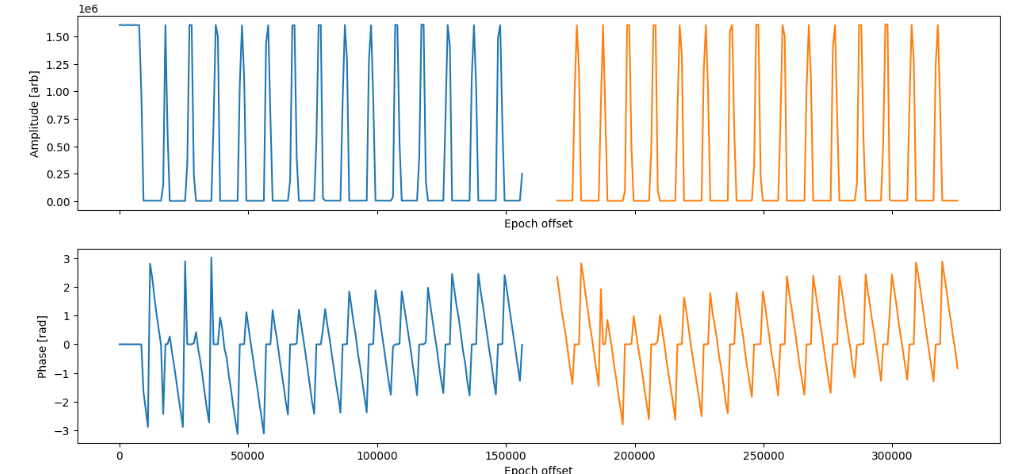

## Low target

```
altaz_a = {"alt": 15, "az": 45}
altaz_b = {"alt": 15, "az": 45}
```

In [35]:
altitude1 = 15*u.deg  # degrees
azimuth1 = 45* u.deg

altitude2 = 15*u.deg  # degrees
azimuth2 = 45*u.deg

In [36]:
repoint_time = datetime.fromisoformat('1970-01-02 19:36:44.550804') # time of repointing (between scans)
# current elevation
altazframe = AltAz(obstime=[repoint_time], location=ref_location)
print(altazframe)

test_target1 = SkyCoord(alt = altitude1, az = azimuth1, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target2 = SkyCoord(alt = altitude2, az = azimuth2, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target_radec1 = test_target1.transform_to(ICRS)
test_target_radec2 = test_target2.transform_to(ICRS)

print(f"Repointing from target ({test_target_radec1.to_string('hmsdms')}) to target ({test_target_radec2.to_string('hmsdms')}) over angle {test_target_radec1.separation(test_target_radec2)}")

<AltAz Frame (obstime=[datetime.datetime(1970, 1, 2, 19, 36, 44, 550804)], location=(-2565037.99995156, 5085750.94817946, -2861055.21935413) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>
Repointing from target (13h40m07.40453867s +29d22m21.11094095s) to target (13h40m07.40453867s +29d22m21.11094095s) over angle 0.0 deg


```
Target Number of packets to capture: 208512
1970-01-02 19:36:44.550804: 2304
1970-01-02 19:36:44.550804: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [38947, null], "stn_delay_ns": [{"stn": 345, "ns": -1419.2418074063885}, {"stn": 350, "ns": -1539.4980810495624}, {"stn": 352, "ns": 7282.1182688137715}, {"stn": 431, "ns": -7774.6415593560005}]}]}, {"current_secs": 38953.27604736, "pkt_no_spread": 0}]
1970-01-02 19:36:49.562677: 9216
1970-01-02 19:36:49.562677: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [38947, null], "stn_delay_ns": [{"stn": 345, "ns": -1419.2418074063885}, {"stn": 350, "ns": -1539.4980810495624}, {"stn": 352, "ns": 7282.1182688137715}, {"stn": 431, "ns": -7774.6415593560005}]}]}, {"current_secs": 38953.27604736, "pkt_no_spread": 0}]
...

Target Number of packets to capture: 208512
1970-01-02 19:39:34.547100: 217728
1970-01-02 19:39:34.547100: []
1970-01-02 19:39:39.557356: 224640
1970-01-02 19:39:39.557356: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [39117.0, 39097.0], "stn_delay_ns": [{"stn": 345, "ns": -1427.5668977922892}, {"stn": 350, "ns": -1546.8755172250515}, {"stn": 352, "ns": 7229.410033598176}, {"stn": 431, "ns": -7761.4051125047445}]}]}, {"current_secs": 39125.26651392, "pkt_no_spread": 0}]
1970-01-02 19:39:44.569229: 230400
1970-01-02 19:39:44.569229: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [39117.0, 39127.0], "stn_delay_ns": [{"stn": 345, "ns": -1419.8675562308324}, {"stn": 350, "ns": -1540.0954141391692}, {"stn": 352, "ns": 7280.5820238413635}, {"stn": 431, "ns": -7775.147046014648}]}]}, {"current_secs": 39133.26452736, "pkt_no_spread": 0}]
...
```

```
/mnt/clp-k8s-fpga-worker-1/pcap/output/20240821_104813_corr-0_0_7-main_0b854483.cnic-0_1_12.sdp.pcap
```

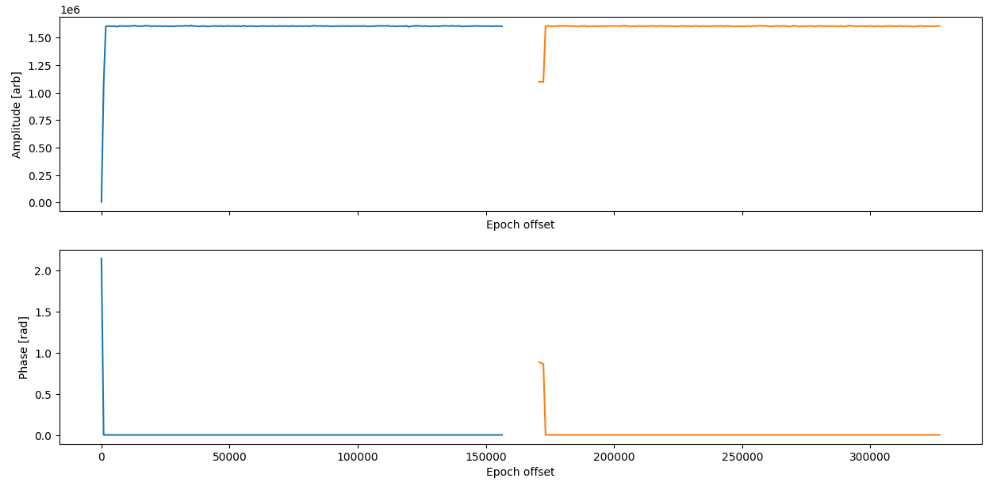

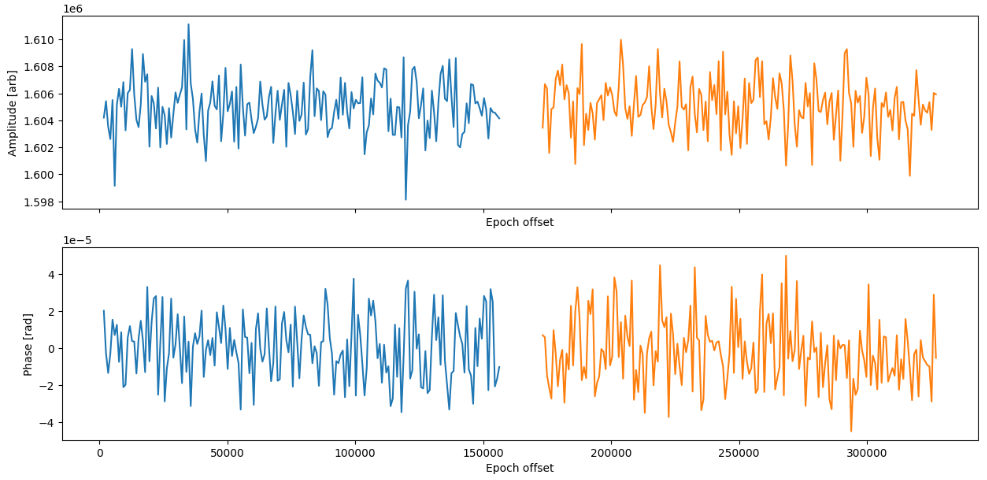

## Azimuth separation

```
altaz_a = {"alt": 50, "az": 10}
altaz_a = {"alt": 50, "az": 45}
```

In [37]:
altitude1 = 50*u.deg  # degrees
azimuth1 = 10* u.deg

altitude2 = 50*u.deg  # degrees
azimuth2 = 45*u.deg

In [38]:
repoint_time = datetime.fromisoformat('1970-01-02 19:36:44.550804') # time of repointing (between scans)
# current elevation
altazframe = AltAz(obstime=[repoint_time], location=ref_location)
print(altazframe)

test_target1 = SkyCoord(alt = altitude1, az = azimuth1, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target2 = SkyCoord(alt = altitude2, az = azimuth2, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target_radec1 = test_target1.transform_to(ICRS)
test_target_radec2 = test_target2.transform_to(ICRS)

print(f"Repointing from target ({test_target_radec1.to_string('hmsdms')}) to target ({test_target_radec2.to_string('hmsdms')}) over angle {test_target_radec1.separation(test_target_radec2)}")

<AltAz Frame (obstime=[datetime.datetime(1970, 1, 2, 19, 36, 44, 550804)], location=(-2565037.99995156, 5085750.94817946, -2861055.21935413) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>
Repointing from target (10h39m44.82948828s +12d30m26.86136923s) to target (12h01m46.5071158s +03d16m10.52879771s) over angle 22.29173320010446 deg


```
Target Number of packets to capture: 208512
1970-01-02 19:47:04.702482: 2304
1970-01-02 19:47:04.702482: []
1970-01-02 19:47:09.712043: 9216
1970-01-02 19:47:09.712043: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [39557.0, 39574], "stn_delay_ns": [{"stn": 345, "ns": -1441.2319197034506}, {"stn": 350, "ns": -1558.723607689305}, {"stn": 352, "ns": 7128.032780003677}, {"stn": 431, "ns": -7730.491199579753}]}]}, {"current_secs": 39560.81983488, "pkt_no_spread": 0}]
1970-01-02 19:47:14.722623: 16128
1970-01-02 19:47:14.722623: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [39557.0, 39574], "stn_delay_ns": [{"stn": 345, "ns": -1441.2319197034506}, {"stn": 350, "ns": -1558.723607689305}, {"stn": 352, "ns": 7128.032780003677}, {"stn": 431, "ns": -7730.491199579753}]}]}, {"current_secs": 39560.81983488, "pkt_no_spread": 0}]
...

Target Number of packets to capture: 208512
1970-01-02 19:47:04.702482: 2304
1970-01-02 19:47:04.702482: []
1970-01-02 19:47:09.712043: 9216
1970-01-02 19:47:09.712043: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [39557.0, 39574], "stn_delay_ns": [{"stn": 345, "ns": -1441.2319197034506}, {"stn": 350, "ns": -1558.723607689305}, {"stn": 352, "ns": 7128.032780003677}, {"stn": 431, "ns": -7730.491199579753}]}]}, {"current_secs": 39560.81983488, "pkt_no_spread": 0}]
1970-01-02 19:47:14.722623: 16128
1970-01-02 19:47:14.722623: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [39557.0, 39574], "stn_delay_ns": [{"stn": 345, "ns": -1441.2319197034506}, {"stn": 350, "ns": -1558.723607689305}, {"stn": 352, "ns": 7128.032780003677}, {"stn": 431, "ns": -7730.491199579753}]}]}, {"current_secs": 39560.81983488, "pkt_no_spread": 0}]
...
```

```
/mnt/clp-k8s-fpga-worker-1/pcap/output/20240821_105837_corr-0_0_7-main_0b854483.cnic-0_1_12.sdp.pcap
```

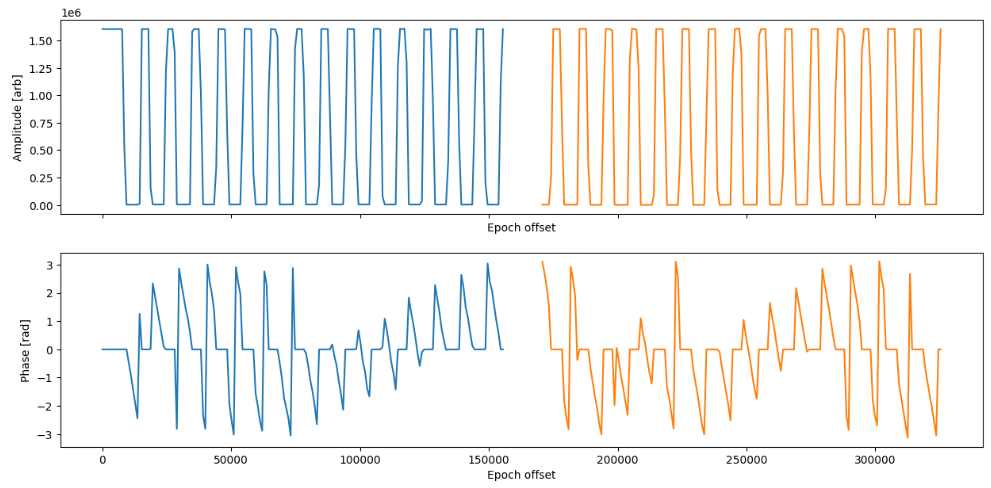

## Test case target

```
altaz_a = {"alt": 50, "az": 10}
altaz_b = {"alt": 55, "az": 45}
```

In [39]:
altitude1 = 50*u.deg  # degrees
azimuth1 = 10* u.deg

altitude2 = 55*u.deg  # degrees
azimuth2 = 45*u.deg

In [40]:
repoint_time = datetime.fromisoformat('1970-01-02 19:57:34.406240') # time of repointing (between scans)
# current elevation
altazframe = AltAz(obstime=[repoint_time], location=ref_location)
print(altazframe)

test_target1 = SkyCoord(alt = altitude1, az = azimuth1, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target2 = SkyCoord(alt = altitude2, az = azimuth2, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target_radec1 = test_target1.transform_to(ICRS)
test_target_radec2 = test_target2.transform_to(ICRS)

print(f"Repointing from target ({test_target_radec1.to_string('hmsdms')}) to target ({test_target_radec2.to_string('hmsdms')}) over angle {test_target_radec1.separation(test_target_radec2)}")

<AltAz Frame (obstime=[datetime.datetime(1970, 1, 2, 19, 57, 34, 406240)], location=(-2565037.99995156, 5085750.94817946, -2861055.21935413) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>
Repointing from target (11h00m37.44149118s +12d30m11.23130553s) to target (12h10m01.87092368s -00d36m29.01499943s) over angle 21.642198710769375 deg


```
Target Number of packets to capture: 208512
1970-01-02 19:57:34.406240: 2304
1970-01-02 19:57:34.406240: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [40194.0, 40203], "stn_delay_ns": [{"stn": 345, "ns": -1443.5733846210228}, {"stn": 350, "ns": -1560.923865835876}, {"stn": 352, "ns": 7120.302878038209}, {"stn": 431, "ns": -7731.157520411225}]}]}, {"current_secs": 40197.48913152, "pkt_no_spread": 0}]
1970-01-02 19:57:39.418486: 9216
1970-01-02 19:57:39.418486: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [40194.0, 40203], "stn_delay_ns": [{"stn": 345, "ns": -1443.5733846210228}, {"stn": 350, "ns": -1560.923865835876}, {"stn": 352, "ns": 7120.302878038209}, {"stn": 431, "ns": -7731.157520411225}]}]}, {"current_secs": 40197.48913152, "pkt_no_spread": 0}]
...

Target Number of packets to capture: 208512
1970-01-02 20:00:14.751093: 215424
1970-01-02 20:00:14.751093: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [40353.0, 40363.0], "stn_delay_ns": [{"stn": 345, "ns": -13188.855414773236}, {"stn": 350, "ns": -12998.919160424268}, {"stn": 352, "ns": -9021.272216525365}, {"stn": 431, "ns": -25083.23407957687}]}]}, {"current_secs": 40357.47815424, "pkt_no_spread": 0}]
1970-01-02 20:00:19.762507: 222336
1970-01-02 20:00:19.762507: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [40353.0, 40363.0], "stn_delay_ns": [{"stn": 345, "ns": -13188.855414773236}, {"stn": 350, "ns": -12998.919160424268}, {"stn": 352, "ns": -9021.272216525365}, {"stn": 431, "ns": -25083.23407957687}]}]}, {"current_secs": 40357.47815424, "pkt_no_spread": 0}]
```

```
/mnt/clp-k8s-fpga-worker-1/pcap/output/20240821_110906_corr-0_0_7-main_0b854483.cnic-0_1_12.sdp.pcap
```

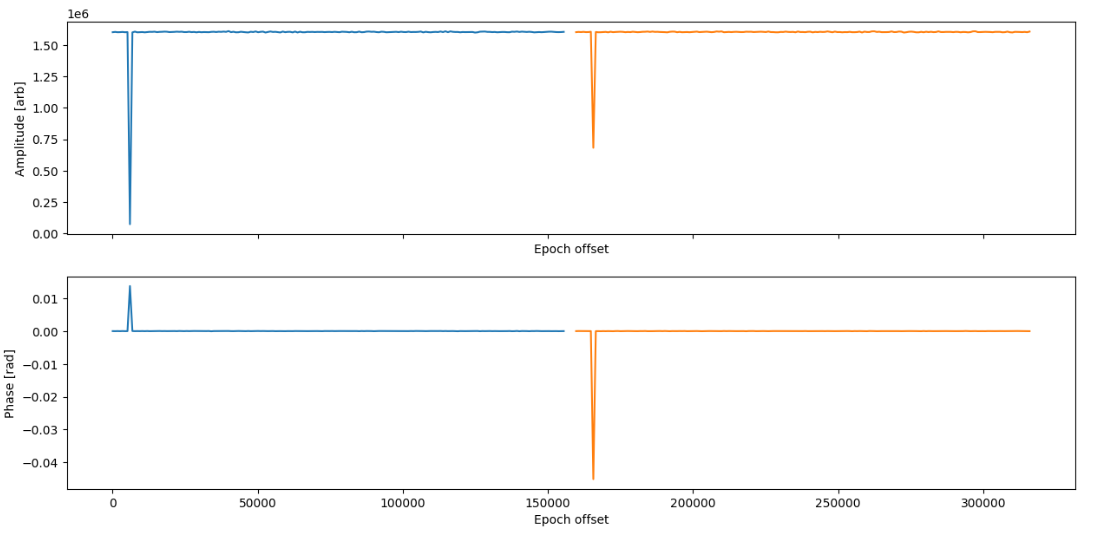

Schermafbeelding 2024-08-22 041440.png

## Large angular distance

```
altaz_a = {"alt": 15, "az": 10}
altaz_b = {"alt": 55, "az": 45}
```

In [41]:
altitude1 = 15*u.deg  # degrees
azimuth1 = 10* u.deg

altitude2 = 55*u.deg  # degrees
azimuth2 = 45*u.deg

In [42]:
repoint_time = datetime.fromisoformat('1970-01-02 20:20:34.287436') # time of repointing (between scans)
# current elevation
altazframe = AltAz(obstime=[repoint_time], location=ref_location)
print(altazframe)

test_target1 = SkyCoord(alt = altitude1, az = azimuth1, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target2 = SkyCoord(alt = altitude2, az = azimuth2, obstime = repoint_time, frame = 'altaz', location = ref_location)
test_target_radec1 = test_target1.transform_to(ICRS)
test_target_radec2 = test_target2.transform_to(ICRS)

print(f"Repointing from target ({test_target_radec1.to_string('hmsdms')}) to target ({test_target_radec2.to_string('hmsdms')}) over angle {test_target_radec1.separation(test_target_radec2)}")

<AltAz Frame (obstime=[datetime.datetime(1970, 1, 2, 20, 20, 34, 287436)], location=(-2565037.99995156, 5085750.94817946, -2861055.21935413) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>
Repointing from target (11h54m24.1237593s +46d54m00.03940322s) to target (12h33m05.70473654s -00d36m22.71419836s) over angle 48.25668300383211 deg


```
Target Number of packets to capture: 208512
1970-01-02 20:20:34.287436: 2304
1970-01-02 20:20:34.287436: []
1970-01-02 20:20:39.298915: 8064
1970-01-02 20:20:39.298915: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [41579, null], "stn_delay_ns": [{"stn": 345, "ns": -1426.4564132687844}, {"stn": 350, "ns": -1546.5463802941965}, {"stn": 352, "ns": 7273.5424383462005}, {"stn": 431, "ns": -7786.121488145257}]}]}, {"current_secs": 41582.09654784, "pkt_no_spread": 0}]
1970-01-02 20:20:44.312018: 14976
1970-01-02 20:20:44.312018: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [41579, 41589.0], "stn_delay_ns": [{"stn": 345, "ns": -1426.4564132687844}, {"stn": 350, "ns": -1546.5463802941965}, {"stn": 352, "ns": 7273.5424383462005}, {"stn": 431, "ns": -7786.121488145257}]}]}, {"current_secs": 41590.09456128, "pkt_no_spread": 0}]
...

Target Number of packets to capture: 208512
1970-01-02 20:23:14.372922: 214272
1970-01-02 20:23:14.372922: []
1970-01-02 20:23:19.384369: 221184
1970-01-02 20:23:19.384369: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [41739.0, 41729.0], "stn_delay_ns": [{"stn": 345, "ns": -1434.7806029903093}, {"stn": 350, "ns": -1553.9225538107505}, {"stn": 352, "ns": 7220.813512877472}, {"stn": 431, "ns": -7772.870155285148}]}]}, {"current_secs": 41742.085570560004, "pkt_no_spread": 0}]
1970-01-02 20:23:24.396230: 228096
1970-01-02 20:23:24.396230: [{"subarray_id": 2, "beams": [{"beam_id": 1, "valid_delay": true, "subscription_valid": true, "delay_start_secs": [41739.0, 41749.0], "stn_delay_ns": [{"stn": 345, "ns": -13161.691034480482}, {"stn": 350, "ns": -12973.307718475611}, {"stn": 352, "ns": -8936.836061056314}, {"stn": 431, "ns": -25072.304487011796}]}]}, {"current_secs": 41750.08800768, "pkt_no_spread": 0}]
...
```

```
/mnt/clp-k8s-fpga-worker-1/pcap/output/20240821_113205_corr-0_0_7-main_0b854483.cnic-0_1_12.sdp.pcap
```

Schermafbeelding 2024-08-22 035256.png

Schermafbeelding 2024-08-22 035350.png

In [43]:
# checking test case and repointing
#/mnt/clp-k8s-fpga-worker-1/pcap/output/20240822_024055_corr-0_0_7-main_0b854483.cnic-0_1_12-main_1fedd08b.sdp.pcap
#/mnt/clp-k8s-fpga-worker-1/pcap/output/20240822_025842_corr-0_0_7-main_0b854483.cnic-0_1_12-main_1fedd08b.sdp.pcap
#/mnt/clp-k8s-fpga-worker-1/pcap/output/20240822_030752_corr-0_0_7-main_0b854483.cnic-0_1_12-main_1fedd08b.sdp.pcap
#/mnt/clp-k8s-fpga-worker-1/pcap/output/20240822_031610_corr-0_0_7-main_0b854483.cnic-0_1_12-main_1fedd08b.sdp.pcap
#/mnt/clp-k8s-fpga-worker-1/pcap/output/20240822_033347_corr-0_0_7-main_0b854483.cnic-0_1_12-main_1fedd08b.sdp.pcap

In [ ]:
# large angular separation test
